In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from IPython.core.display_functions import display

In [2]:
df = pd.DataFrame(np.array([['SW', 2, 'F', 20],
                            ['Math', 3, 'M', 20],
                            ['Art', 3, 'F', 15],
                            ['English', 3, 'M', 28],
                            ['Math', 3, 'F', 26],
                            ['English', 3, 'M', 17],
                            ['Math', 3, 'F', 26],
                            ['SW', 3, 'F', 40],
                            ['SW', 3, 'M', 33],
                            ['English', 3, 'M', 18],
                            ['Math', 3, 'M', 25],
                            ['Math', 3, 'F', 30],
                            ['SW', 3, 'F', 45],
                            ['Art', 3, 'M', 20]]),
                  columns=['Major', 'Year', 'Gender', 'StudyHours'])
df['StudyHours'] = df['StudyHours'].astype(np.int64)

In [3]:
# Convert categorical features to numeric values using oneHotEncoder
df_copy = df.copy()
encoder = LabelEncoder()

encoder.fit(df_copy['Major'])
df_copy['Major'] = encoder.transform(df['Major'])  # Art = 0, English = 1, Math = 2, SW = 3

encoder.fit(df_copy['Gender'])
df_copy['Gender'] = encoder.transform(df['Gender'])  # Female = 0, Male = 1

In [4]:
# Split dataset to train and test sets
x_train = df_copy[['Major', 'Year', 'Gender']]
y_train = df_copy[['StudyHours']]

In [5]:
# Decision Tree regression
model = DecisionTreeRegressor(min_samples_split=4, min_impurity_decrease=0.1, random_state=0)
model.fit(x_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.1, min_samples_split=4,
                      random_state=0)

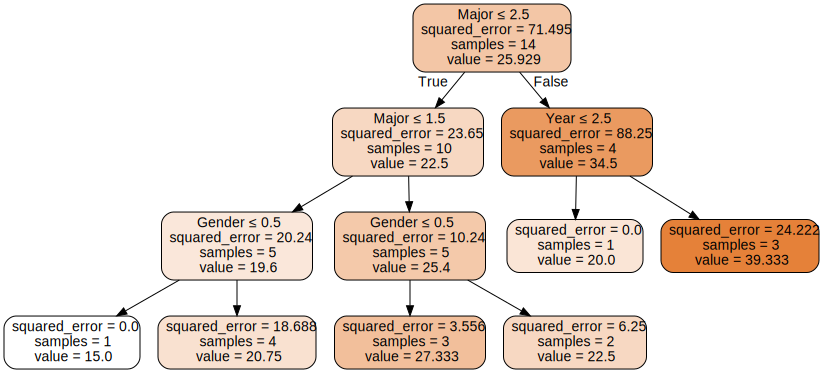

In [6]:
# visualization
dot_data = export_graphviz(model,  # Decision Tree Model Replacement
                           out_file=None,  # Convert to file?
                           feature_names=x_train.columns,  # Feature name
                           class_names=y_train.columns,  # Target name
                           filled=True,  # Coloring or not
                           rounded=True,  # Rounding progress
                           special_characters=True)  # Whether to use special characters

display(graphviz.Source(dot_data))

[Text(0.5909090909090909, 0.875, 'Major <= 2.5\nsquared_error = 71.495\nsamples = 14\nvalue = 25.929'),
 Text(0.36363636363636365, 0.625, 'Major <= 1.5\nsquared_error = 23.65\nsamples = 10\nvalue = 22.5'),
 Text(0.18181818181818182, 0.375, 'Gender <= 0.5\nsquared_error = 20.24\nsamples = 5\nvalue = 19.6'),
 Text(0.09090909090909091, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.2727272727272727, 0.125, 'squared_error = 18.688\nsamples = 4\nvalue = 20.75'),
 Text(0.5454545454545454, 0.375, 'Gender <= 0.5\nsquared_error = 10.24\nsamples = 5\nvalue = 25.4'),
 Text(0.45454545454545453, 0.125, 'squared_error = 3.556\nsamples = 3\nvalue = 27.333'),
 Text(0.6363636363636364, 0.125, 'squared_error = 6.25\nsamples = 2\nvalue = 22.5'),
 Text(0.8181818181818182, 0.625, 'Year <= 2.5\nsquared_error = 88.25\nsamples = 4\nvalue = 34.5'),
 Text(0.7272727272727273, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 20.0'),
 Text(0.9090909090909091, 0.375, 'squared_error = 24.222\nsam

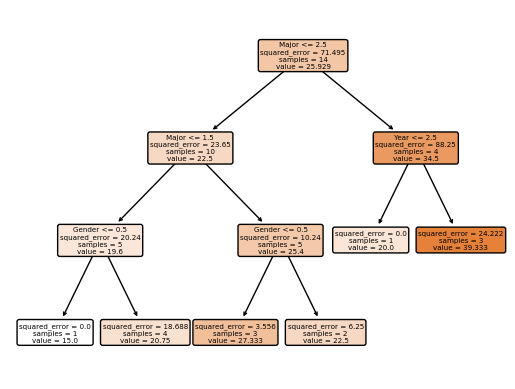

In [7]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=x_train.columns,  # Feature name
          class_names=y_train.columns,  # Target name
          filled=True,  # Coloring or not
          rounded=True)  # Rounding progress